In [2]:
from sklearn.linear_model import Ridge,LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
import pandas as pd
import numpy as np

mercari_df=pd.read_csv('data/train.tsv',sep='\t')
print(mercari_df.shape)
mercari_df.head(3)

(1482535, 8)


,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...


In [4]:
mercari_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482535 entries, 0 to 1482534
Data columns (total 8 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   train_id           1482535 non-null  int64  
 1   name               1482535 non-null  object 
 2   item_condition_id  1482535 non-null  int64  
 3   category_name      1476208 non-null  object 
 4   brand_name         849853 non-null   object 
 5   price              1482535 non-null  float64
 6   shipping           1482535 non-null  int64  
 7   item_description   1482531 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 90.5+ MB


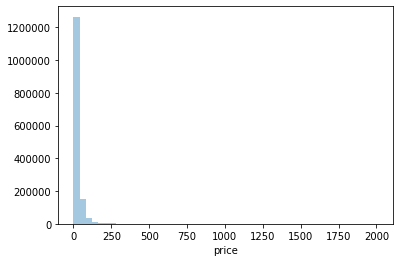

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

y_train_df=mercari_df['price']
plt.figure(figsize=(6,4))
sns.distplot(y_train_df,kde=False)

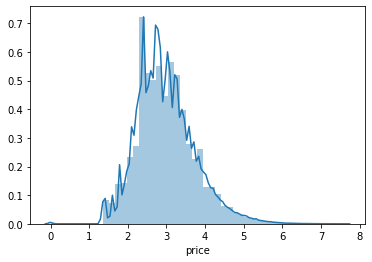

In [8]:
y_train_df=np.log1p(y_train_df)
sns.distplot(y_train_df,kde=True)

In [9]:
print('Shipping value counts :\n',mercari_df['shipping'].value_counts())
print('item_condition_id value counts :\n',mercari_df['item_condition_id'].value_counts())

Shipping value counts :
 0    819435
1    663100
Name: shipping, dtype: int64
item_condition_id value counts :
 1    640549
3    432161
2    375479
4     31962
5      2384
Name: item_condition_id, dtype: int64


In [12]:
boolean_cond=mercari_df['item_description']=='No description yet'
mercari_df[boolean_cond]['item_description'].count()

82489

In [15]:
def split_cat(category_name):
    try:
        return category_name.split('/')
    except:
        return ['Other_Null','Other_Null','Other_Null']
mercari_df['cat_dae'],mercari_df['cat_jung'],mercari_df['cat_so']=zip(*mercari_df['category_name'].apply(lambda x:split_cat(x)))


In [35]:
mercari_df['category_name'].apply(lambda x:split_cat(x))

0                                      [Men, Tops, T-shirts]
1          [Electronics, Computers & Tablets, Components ...
2                            [Women, Tops & Blouses, Blouse]
3                     [Home, Home Décor, Home Décor Accents]
4                                [Women, Jewelry, Necklaces]
                                 ...                        
1482530                           [Women, Dresses, Mid-Calf]
1482531                         [Kids, Girls 2T-5T, Dresses]
1482532    [Sports & Outdoors, Exercise, Fitness accessor...
1482533               [Home, Home Décor, Home Décor Accents]
1482534                [Women, Women's Accessories, Wallets]
Name: category_name, Length: 1482535, dtype: object

In [46]:
mercari_df['brand_name']=mercari_df['brand_name'].fillna('Other_Null')
mercari_df['category_name']=mercari_df['category_name'].fillna('Other_Null')
mercari_df['item_description']=mercari_df['item_description'].fillna('Other_Null')

mercari_df.isnull().sum()

train_id             0
name                 0
item_condition_id    0
category_name        0
brand_name           0
price                0
shipping             0
item_description     0
cat_dae              0
cat_jung             0
cat_so               0
dtype: int64

In [57]:
print('brand name unique :',mercari_df['brand_name'].nunique()) #unique().shape[0]


brand name unique : 4810


In [60]:
print('name nunique :',mercari_df['name'].nunique())
print(mercari_df['name'][:10])

name nunique : 1225273
0       MLB Cincinnati Reds T Shirt Size XL
1          Razer BlackWidow Chroma Keyboard
2                            AVA-VIV Blouse
3                     Leather Horse Statues
4                      24K GOLD plated rose
5          Bundled items requested for Ruie
6        Acacia pacific tides santorini top
7      Girls cheer and tumbling bundle of 7
8                     Girls Nike Pro shorts
9    Porcelain clown doll checker pants VTG
Name: name, dtype: object


In [61]:
pd.set_option('max_colwidth',200)
print('item_description :',mercari_df['item_description'].str.len().mean())

item_description : 145.7113889385411


In [68]:
mercari_df['item_description'][2]

'Adorable top with a hint of lace and a key hole in the back! The pale pink is a 1X, and I also have a 3X available in white!'

In [ ]:
cnt_vec=CountVectorizer()
X_name=cnt_vec.fit_transform(mercari_df.name)

tfidf_descp=TfidfVectorizer(max_features=50000,ngram_range=(1,3),stop_words='english')
X_descp=tfidf_descp.fit_transform(mercari_df['item_description'])

print(X_name.shape,X_descp.shape)

In [ ]:
from sklearn.preprocessing import LabelBinarizer

lb_brand_name=LabelBinarizer(sparse_output=True)
X_brand=lb_brand_name.fit_transform(mercari_df['brand_name'])
lb_item_cond_id=LabelBinarizer(sparse_output=True)
X_item_cond_id=lb_item_cond_id.fit_transform(mercari_df['item_condition_id'])
lb_shipping=LabelBinarizer(sparse_output=True)
X_shipping=lb_shipping.fit_transform(mercari_df['shipping'])


lb_cat_dae=LabelBinarizer(sparse_output=True)
X_cat_dae=lb_cat_dae.fit_transform(mercari_df['cat_dae'])
lb_cat_jung=LabelBinarizer(sparse_output=True)
X_cat_jung=lb_cat_jung.fit_transform(mercari_df['cat_jung'])
lb_cat_so=LabelBinarizer(sparse_output=True)
X_cat_so=lb_cat_so.fit_transform(mercari_df['cat_so'])

In [ ]:
print(type(X_brand),type(X_item_cond_id),type(X_shipping))

In [ ]:
from scipy.sparse import hstack
import gc

sparse_matrix_list=(X_name,X_dsecp,X_brand,X_item_cond_id,X_shipping,X_cat_dae,X_cat_jung,X_cat_so)
X_faetures_sparse=hstack(sparse_matrix_list).toscr()
print(type(X_features_sparse),X_features_sparse.shape)

del X_features_sparse
gc.collect()

In [ ]:
def rmsle(y,y_pred):
    return np.sqrt(np.mean(np.power(np.log1p(y)-np.log1p(y_pred),2)))
def evaludate_org_price(y_test,preds):
    preds_exmpm=np.expm1(preds)
    y_test_exmpm=np.expm1(y_test)
    
    rmsle_result=rmsle(y_test_exmpm,preds_exmpm)
    return rmsle_result